In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [48]:
df = pd.read_csv("../data/adult.csv", na_values="?", index_col=0).dropna()
df.loc[df["salary K$"] <= 50, "salary"] = "<=50K"
df.loc[df["salary K$"] > 50, "salary"] = ">50K"

,age,hours-per-week,salary K$
count,30162.000000,30162.000000,30162.000000
mean,38.437902,40.931238,73.968570
std,13.134665,11.979984,85.365144
min,17.000000,1.000000,15.000000
25%,28.000000,40.000000,26.000000
50%,37.000000,40.000000,38.000000
75%,47.000000,45.000000,49.000000
max,90.000000,99.000000,349.000000


 # Task 1
Print the count of men and women in the dataset.

In [45]:
print(
    f"Males count = {df['sex'].value_counts().loc['Male']}\n"
    f"Females count = {df['sex'].value_counts().loc['Female']}"
)

Males count = 20380
Females count = 9782


# Task 2
Find the average age of men in dataset

In [47]:
df.loc[df["sex"] == "Male", "age"].mean()

39.18400392541707

# Task 3
Get the percentage of people from Poland (native-country)

In [64]:
(len(df[df["native-country"] == "Poland"]) / len(df)) * 100


0.18566408063125786

# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [80]:
print("Age std of people earning >50K: ", end="")
print(df.query("salary == '>50K'")["age"].std())
print("Age std of people earning <=50K: ", end="")
print(df.query("salary == '<=50K'")["age"].std())

Age std of people earning >50K: 10.269632835673852
Age std of people earning <=50K: 13.464631257161633


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [86]:
df.loc[
    (
        ~df.education.isin(
            ["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"]
        ) & df.salary == ">50K"
    ),
].count()

age               0
workclass         0
education         0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
hours-per-week    0
native-country    0
salary            0
salary K$         0
dtype: int64

# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [88]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [102]:
married_avg_salary = df.loc[df["marital-status"].str.startswith("Married"), "salary K$"].mean()
free_avg_salary = df.loc[~df["marital-status"].str.startswith("Married"), "salary K$"].mean()
print(
    f"On average, married men earn around {married_avg_salary} K$, "
    f"while the unmarried - {free_avg_salary}"
)

On average, married men earn around 107.3532097399004 K$, while the unmarried - 43.240927034254426


42.68954067515219

# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [118]:
print(f"Max hours at work per week: {df['hours-per-week'].max()}")
df.groupby("hours-per-week").count()

Max hours at work per week: 99


,age,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary,salary K$
hours-per-week,,,,,,,,,,,
1,7,7,7,7,7,7,7,7,7,7,7
2,15,15,15,15,15,15,15,15,15,15,15
3,24,24,24,24,24,24,24,24,24,24,24
4,27,27,27,27,27,27,27,27,27,27,27
5,38,38,38,38,38,38,38,38,38,38,38
...,...,...,...,...,...,...,...,...,...,...,...
95,2,2,2,2,2,2,2,2,2,2,2
96,5,5,5,5,5,5,5,5,5,5,5
97,2,2,2,2,2,2,2,2,2,2,2


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

In [119]:
df.corr()

,age,hours-per-week,salary K$
age,1.000000,0.101599,0.208203
hours-per-week,0.101599,1.000000,0.196378
salary K$,0.208203,0.196378,1.000000


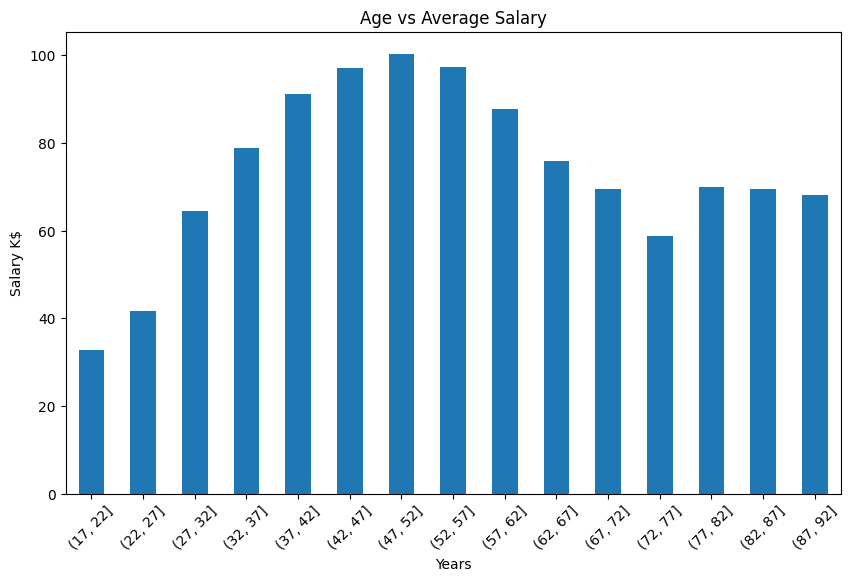

90

In [142]:
df.groupby(
    pd.cut(df.age, range(df.age.min(), df.age.max() + 5, 5))
)["salary K$"].mean().plot(kind="bar", figsize=(10, 6))

plt.title("Age vs Average Salary")
plt.xlabel("Years")
plt.ylabel("Salary K$")
plt.xticks(rotation=45)
plt.show()
df.age.max()

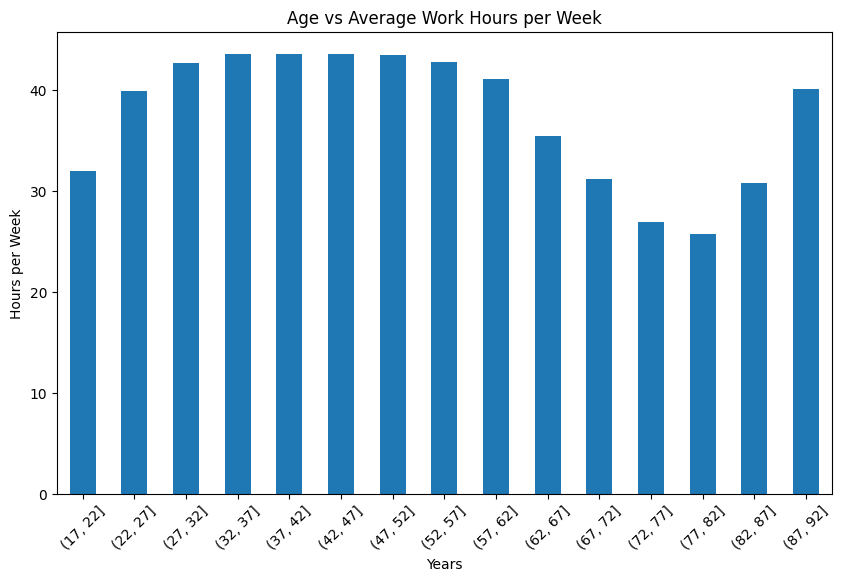

In [149]:
df.groupby(
    pd.cut(df.age, range(df.age.min(), df.age.max() + 5, 5))
)["hours-per-week"].mean().plot(kind="bar", figsize=(10, 6))
plt.title("Age vs Average Work Hours per Week")
plt.xlabel("Years")
plt.ylabel("Hours per Week")
plt.xticks(rotation=45)
plt.show()

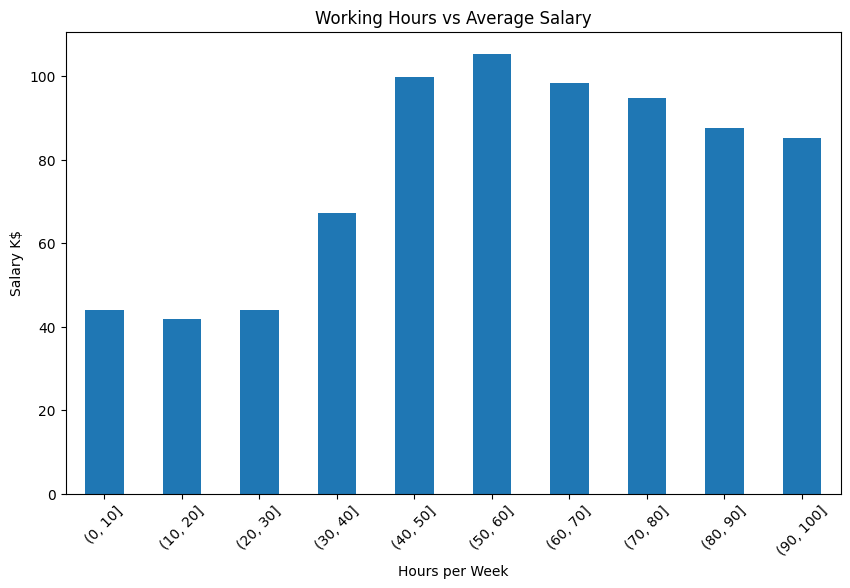

In [151]:
df.groupby(
    pd.cut(df["hours-per-week"], range(0, df["hours-per-week"].max() + 10, 10))
)["salary K$"].mean().plot(kind="bar", figsize=(10, 6))

plt.title("Working Hours vs Average Salary")
plt.xlabel("Hours per Week")
plt.ylabel("Salary K$")
plt.xticks(rotation=45)
plt.show()

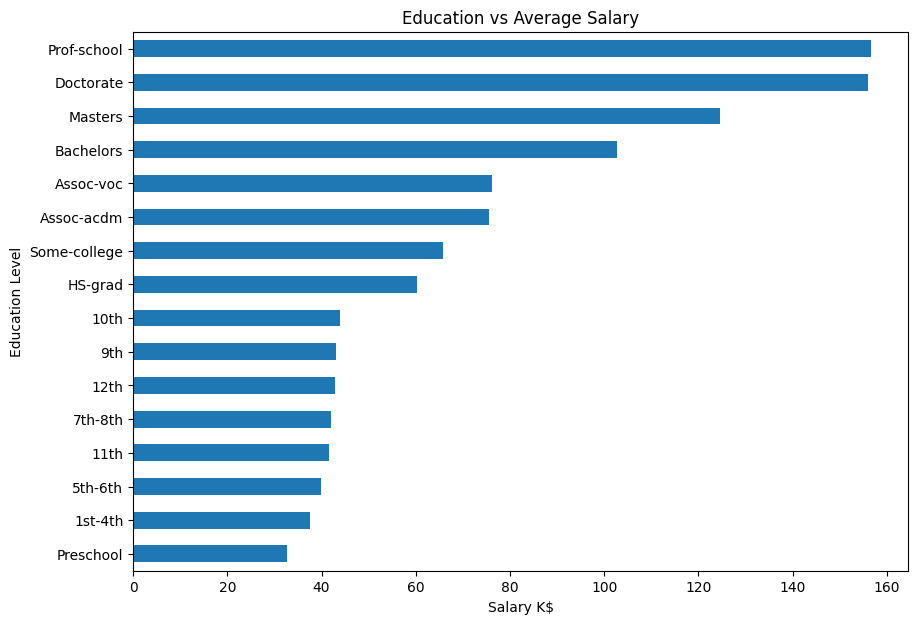

In [161]:
df.groupby(df.education)["salary K$"].mean().sort_values().plot(kind="barh", figsize=(10, 7))

plt.title("Education vs Average Salary")
plt.ylabel("Education Level")
plt.xlabel("Salary K$")

plt.show()

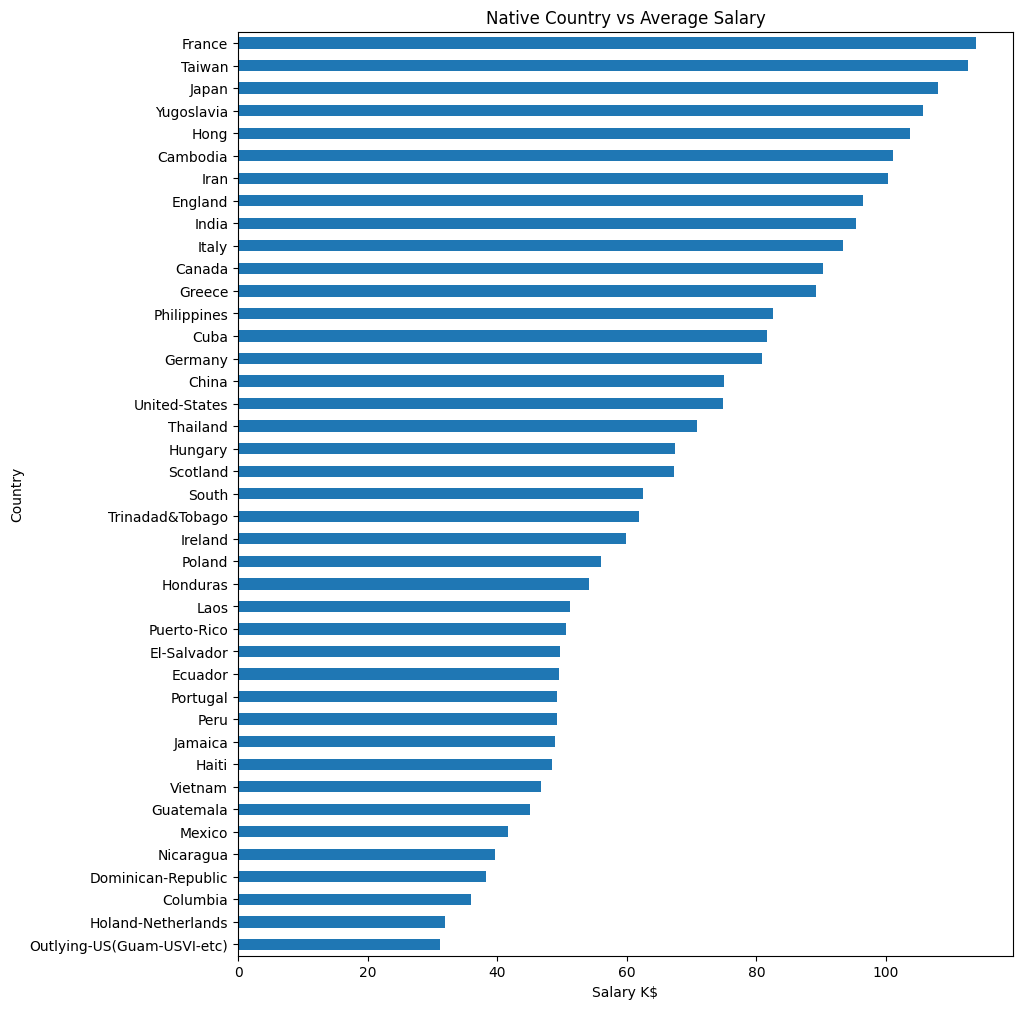

In [163]:
df.groupby(df["native-country"])["salary K$"].mean().sort_values().plot(kind="barh", figsize=(10, 12))

plt.title("Native Country vs Average Salary")
plt.ylabel("Country")
plt.xlabel("Salary K$")

plt.show()

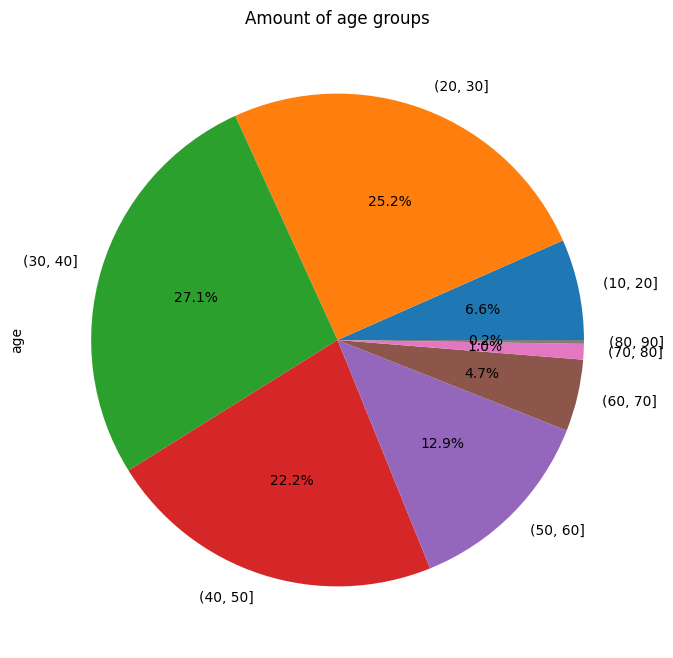

In [172]:
df.groupby(
    pd.cut(df.age, range(10, df.age.max() + 10, 10))
).age.count().plot(kind="pie", figsize=(8, 8), subplots=True, autopct="%1.1f%%")
plt.title("Amount of age groups")
plt.show()

In [ ]:
g